# Project Akhir Semester

## CASE STUDY - Image Compressor
**Nama  : Tatak Asfarian Kurniadi**
**NIM   : 2304130082**

File ini berisi cara untuk membuat iamge compressor menggunakan SVD dan PCA

## Import Library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Library**
Library yang digunakan adalah
1. opencv digunakan untuk load gambar dan konverter warna gambar
2. numpy untuk melakukan perhitungan matriks gambar
3. matplotlib untuk menampilkan gambar

## Konverter Warna

In [3]:
#ubah warna ke RGB
def convert_RGB(image):
    #load gambar
    original_Image=cv2.imread(image)

    #ubah dari BGR ke RGB
    image_RGB=cv2.cvtColor(original_Image,cv2.COLOR_BGR2RGB)
    return image_RGB

In [4]:
#Convert Gambar Menjadi GrayScale 
def convert_Grayscale(image):
    #Load Image
    original_Image=cv2.imread(image)

    #convert to grey
    image_Grey = cv2.cvtColor(original_Image, cv2.COLOR_BGR2GRAY)
    return image_Grey

In [5]:
#Convert Gambar Menjadi Hitam Putih 
def convert_Black(image):
    #Load image
    original_Image=cv2.imread(image)
    
    #make the image GrayScale
    grayImage = cv2.cvtColor(original_Image, cv2.COLOR_BGR2GRAY)
    
    #gambar abu menjadi biner
    #value diatas 127 akan menjadi 255(1) dan value dibawahnya akan menjadi 0
    (thresh, image_BnW) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
    return image_BnW

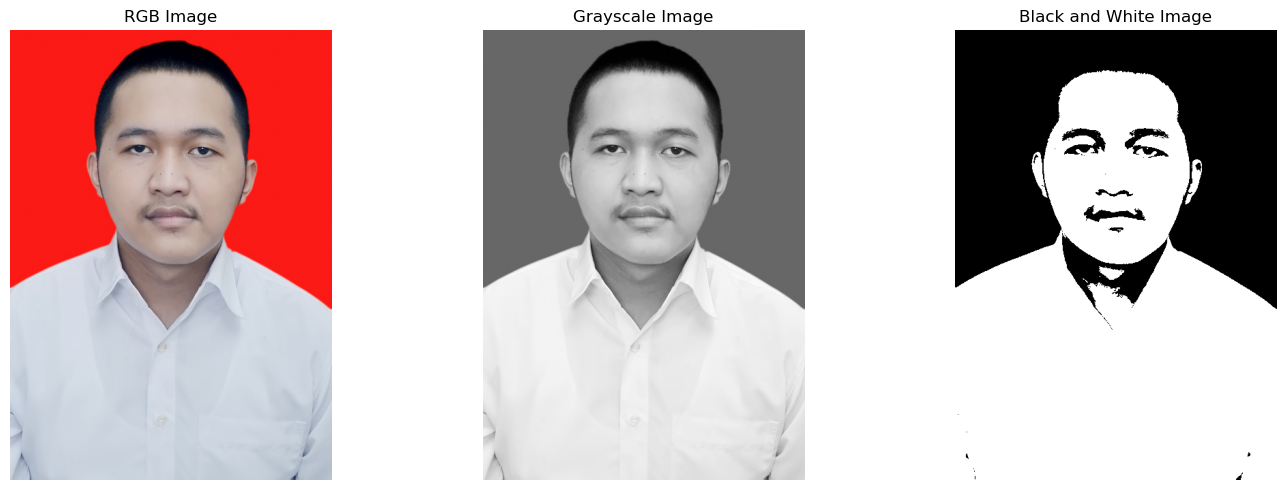

In [6]:
#Cek semua gambar
img_ori=('./tatak/elena.jpg')
img_RGB=convert_RGB(img_ori)
imge_Gray=convert_Grayscale(img_ori)
imge_BnW=convert_Black(img_ori)

# Create a figure
plt.figure(figsize=(15, 5))

# First subplot: RGB image
plt.subplot(1, 3, 1)
plt.title('RGB Image')
plt.imshow(img_RGB / 255.0)
plt.axis('off')  # Hide the axis

# Second subplot: Grayscale image
plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(imge_Gray, cmap='gray')
plt.axis('off')  # Hide the axis

# Third subplot: Black and white image
plt.subplot(1, 3, 3)
plt.title('Black and White Image')
plt.imshow(imge_BnW, cmap='gray')
plt.axis('off')  # Hide the axis

# Adjust layout
plt.tight_layout()
plt.show()


## Image Compressor Using SVD

### RGB
Gambar perlu dirubah menjadi RGB karena format dasar dalam membaca gambar adal BGR

In [7]:
img_RGB.shape

(661, 472, 3)

In [8]:
#Melalukan SVD
def compresschannel_SVD(channel_image,rank):
    # Make the SVD Componet
    U,S,Vt=np.linalg.svd(channel_image)
    #Cut the for the rank
    S=np.diag(S[:rank])
    U=U[:,:rank]
    V=Vt[:rank,:]
    #gabungkan komponen
    compressed_SVD=np.dot(U,np.dot(S.T,V))
    return compressed_SVD

In [9]:
def compres_SVD(img_path,rank):
    img=convert_RGB(img_path)
    #split image
    R,G,B=cv2.split(img)
    R_compressed=compresschannel_SVD(R,rank)
    G_compressed=compresschannel_SVD(G,rank)
    B_compressed=compresschannel_SVD(B,rank)
    
    compressed_image=cv2.merge((R_compressed,G_compressed,B_compressed))
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)
    return compressed_image

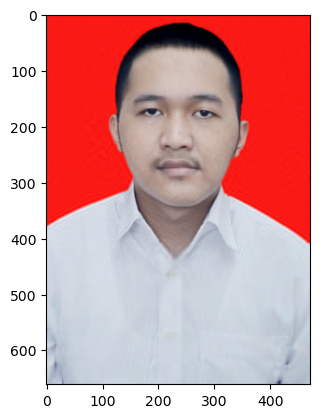

In [10]:
img=('./tatak/elena.jpg')
rank=50
compressed_image=compres_SVD(img,rank)
plt.imshow(compressed_image)

## Image Compressor Using PCA

### RGB

In [55]:
def compress_channel_PCA(channel_image, rank):
    # Mean-center the data
    channel_mean = np.mean(channel_image, axis=0)
    channel_standardized = channel_image - channel_mean

    # Compute covariance matrix
    channel_cov = np.cov(channel_standardized, rowvar=False)

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(channel_cov)

    # Sort eigenvalues and eigenvectors
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Select principal components
    PCA = sorted_eigenvectors[:, :rank]

    # PCA transformation
    channel_transformed = np.dot(channel_standardized, PCA)

    # Reconstruct compressed channel
    channel_reduced = np.dot(channel_transformed, PCA.T) + np.mean(channel_image)

    return channel_reduced


In [53]:
def compress_PCA(img_path,rank):
    img=convert_RGB(img_path)
    img = img.astype(float)
    R,G,B=cv2.split(img)
    R_compressed=compress_channel_PCA(R,rank)
    G_compressed=compress_channel_PCA(G,rank)
    B_compressed=compress_channel_PCA(B,rank)
    compressed_image=cv2.merge((R_compressed,G_compressed,B_compressed))
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)
    return compressed_image

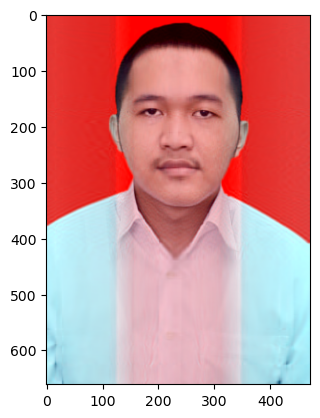

In [56]:
img=('./tatak/elena.jpg')
rank=50
compressed_image=compress_PCA(img,rank)
plt.imshow(compressed_image)